In [1]:
import tensorflow as tf

In [ ]:
# Constant
x = tf.constant(10)
y = tf.constant(15)
z = x+y
z

<tf.Tensor: shape=(), dtype=int32, numpy=25>

##MNIST dataset : Digit classification

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test , y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0 , x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


Step 2 : Build the model , choose an optimizer and loss function

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128 , activation ="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

Step 3: here we are checking what the model is doing in terms of outputs - "Vectors"

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.49002248,  0.44161296,  0.5974182 ,  0.24963398, -0.17279729,
         0.0348555 ,  0.33545908, -0.69321704, -0.344445  ,  0.34950736]],
      dtype=float32)

Step 4: we need the probability of each class instead of vectors

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.13389985, 0.12757221, 0.14908071, 0.10528843, 0.06901144,
        0.0849383 , 0.11472394, 0.0410115 , 0.05812667, 0.11634699]],
      dtype=float32)

Step 5: Finding the scalar loss for each example

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
loss_fn(y_train[:1],predictions).numpy()

2.4658303

Step 6: Model Compilation

In [ ]:
model.compile(optimizer = "adam",
              loss = loss_fn,
              metrics = ["accuracy"])

Model 7: Model fitting to minimize the loss

In [ ]:
model.fit(x_train , y_train , epochs = 5)  # "epochs" : how many time we want to train the model to reduce the loss func

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2957 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1425 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0739 - accuracy: 0.9763


Step 8: Model evaluation

In [ ]:
model.evaluate(x_test , y_test , verbose =2)

313/313 - 1s - loss: 0.0712 - accuracy: 0.9770 - 644ms/epoch - 2ms/step


[0.07120807468891144, 0.9769999980926514]

## Image Classification using Convolutional Neural Network and Tensorflow

1. Convolution layer - Convert images into an array.
2. ReLu layer - Regularization used to convert negative numbers to zero.
3. Pooling layer - Used for reduction of the input image size with filters.
4. Fully connected layer - Combines features and produces a model.


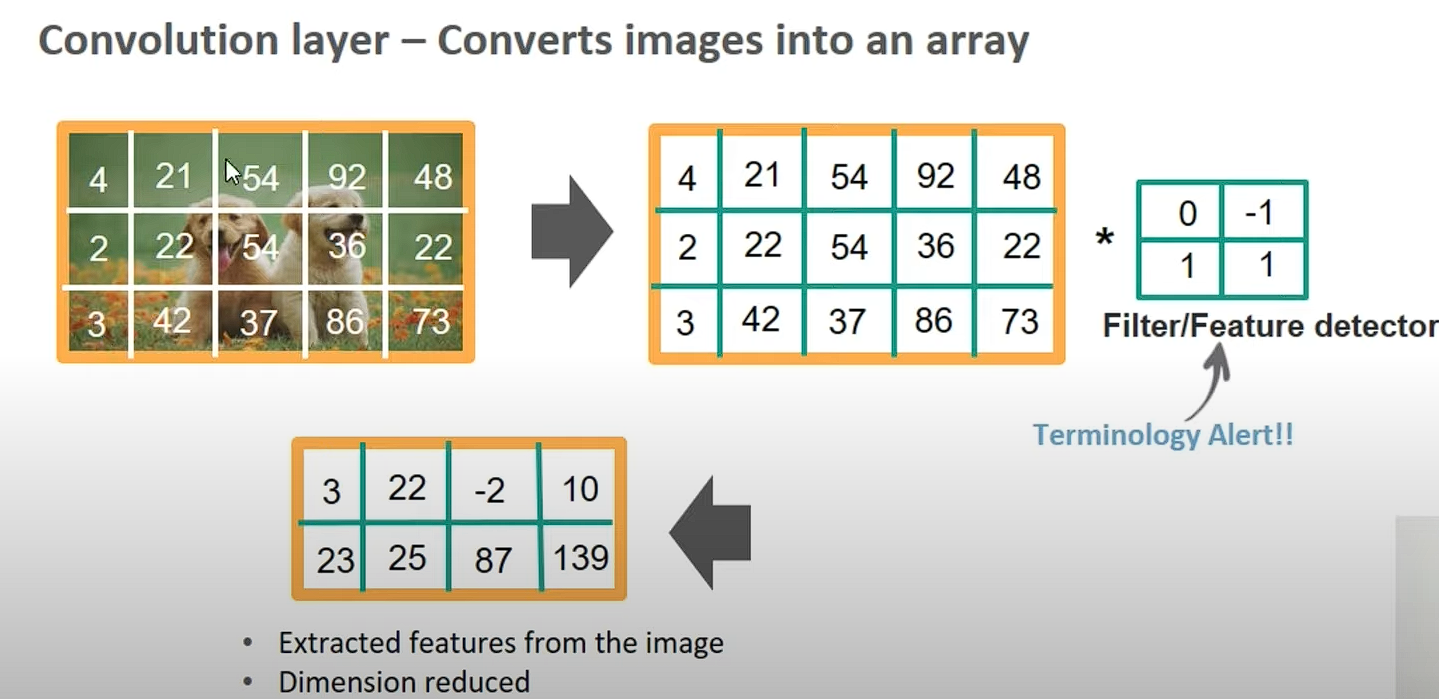

###Pooling layer : used for reduction of th input size with filters


*   Used to reduce the spatial size and the numbers of parameters.
*   pooling is used to reduce the dimensionality.


*   helps to control overfitting.
*   Filters of size 2*2 are commonly used in it





In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-04-30 16:59:54--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2024-04-30 16:59:55--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc89e3adbb1b0fc68ec0b2464bab.dl.dropboxusercontent.com/cd/0/inline/CSAEkhQcN8rkUDgmqQB3vjXxwb992QS2t3ZqbOSEIdpBRluMAjk_YwvpXCQ3-Ax0WZfwt_IJQxa1e0UVeD6dnqDeSicqXvFaL0cnXktytfTe9ZVwKsZq1o43aMxycKk7MDSLPEBsCzin48HXq-hSsOef/file# [following]
--2024-04-30 16:59:55--  https://uc89e3adbb1b0fc68ec0b2464bab.dl.dropboxusercontent.com/cd/0/inline/CSAEkhQcN8rkUDgmqQB3vjXxwb992QS2t3ZqbOSEIdpBRluMAjk_YwvpXCQ3-Ax0WZfwt_IJQxa1e0UVeD6dnqDe

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Priniting a sample image of a cat

Populating the interactive namespace from numpy and matplotlib


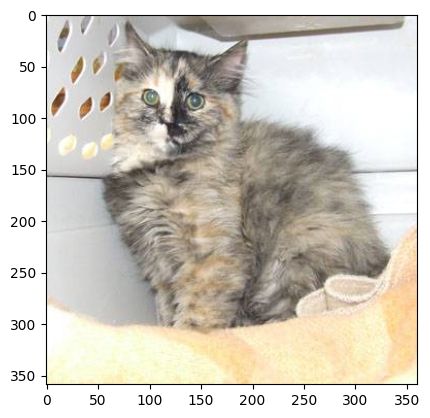

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread("/content/test_set/test_set/cats/cat.4005.jpg")
imgplot = plt.imshow(img)
plt.show()

Priniting a sample image of a Dog

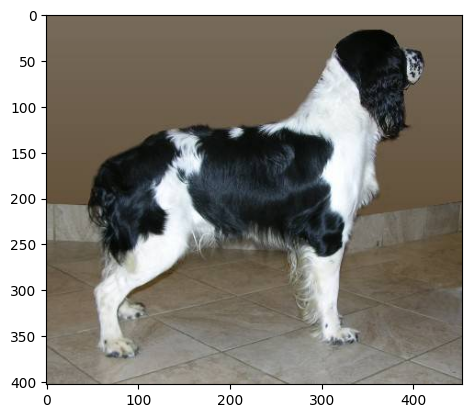

In [4]:
img = npimg.imread("/content/test_set/test_set/dogs/dog.4005.jpg")
imgplot = plt.imshow(img)
plt.show()

In [5]:
# Importing the required libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as npimg

In [6]:
print(tensorflow.__version__)

2.15.0


Parameter initialization

In [7]:
img_width , img_height = 150,150
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_samples = 100
epochs = 50
batch_size =20

##**Checking shapes of the images **
Image data is represented in a 3D array: [rows][cols][channels] in a channel last representation. Channels are the first dimension in channel first representation .
150 x 150 x 3

In [8]:
import tensorflow.keras.backend as k
if k.image_data_format() == "channels_first":
  input_shape = (3 , img_width , img_height)
else:
  input_shape = (img_width , img_height , 3)

Image generation to train the model

In [9]:
train_datagen = ImageDataGenerator(rescale=1. /255, shear_range=0.2, zoom_range=0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1. /255) #Bringing RGB values from 0-255 to a range of 0-1
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height), batch_size=batch_size, class_mode="binary", classes = ["cats","dogs"])
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width,img_height), batch_size=batch_size, class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Representation of ImageDataGenerator

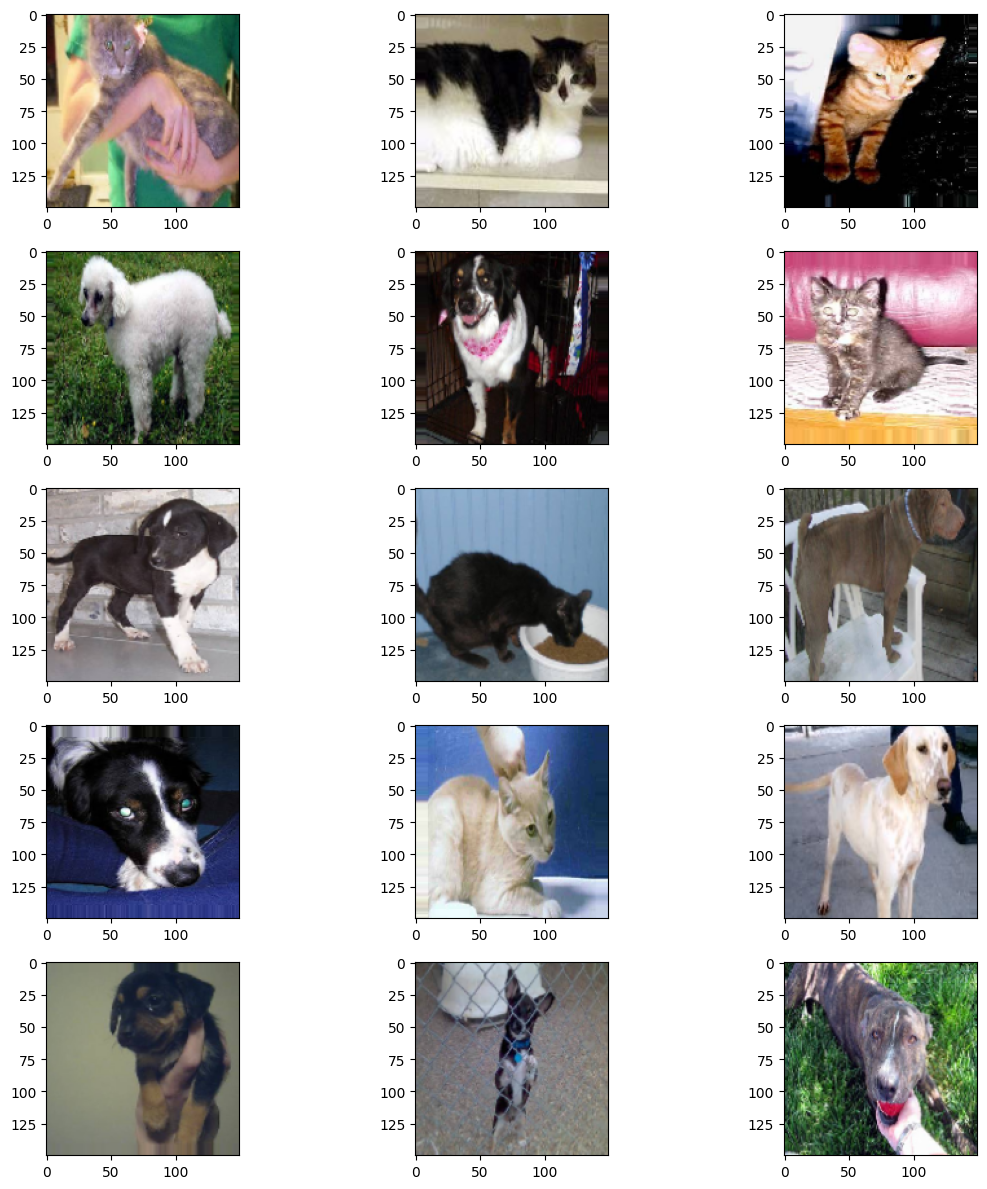

In [10]:
plt.figure(figsize =(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch , Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

##Building the CNN model
### Layers in CNN


1.   Convolutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer(Dense)



In [11]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape= input_shape)) # 64 neurons using a 3x3 filter

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2))) # Pooling reduces the size of the data

model.add(Flatten()) # Conversion of multi-dimensional array to 1D array
model.add(Dense(64))

model.add(Activation("relu"))
model.add(Dense(1)) # Output layer
model.add(Activation("sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

Model Compilation

In [12]:
model.compile(optimizer= "rmsprop" , loss ="binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

Model Fitting

In [13]:
training = model.fit(train_generator,steps_per_epoch = nb_train_sample,epochs = epochs,validation_data=validation_generator, validation_steps= nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 141s 1s/step - loss: 1.7518 - accuracy: 0.5500 - val_loss: 0.7077 - val_accuracy: 0.5250
Epoch 2/20
100/100 [==============================] - 173s 2s/step - loss: 0.6725 - accuracy: 0.5915 - val_loss: 0.6666 - val_accuracy: 0.5765
Epoch 3/20
100/100 [==============================] - 165s 2s/step - loss: 0.6672 - accuracy: 0.6227 - val_loss: 0.6218 - val_accuracy: 0.6335
Epoch 4/20
100/100 [==============================] - 144s 1s/step - loss: 0.6418 - accuracy: 0.6460 - val_loss: 0.6461 - val_accuracy: 0.6475
Epoch 5/20
100/100 [==============================] - 189s 2s/step - loss: 0.6249 - accuracy: 0.6665 - val_loss: 0.6013 - val_accuracy: 0.6795
Epoch 6/20
100/100 [==============================] - 144s 1s/step - loss: 0.6193 - accuracy: 0.6675 - val_loss: 0.7089 - val_accuracy: 0.5900
Epoch 7/20
100/100 [==============================] - 113s 1s/step - loss: 0.5938 - accuracy: 0.6900 - val_loss: 0.5817 - val_accuracy: 0.6990

Finding Out model accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


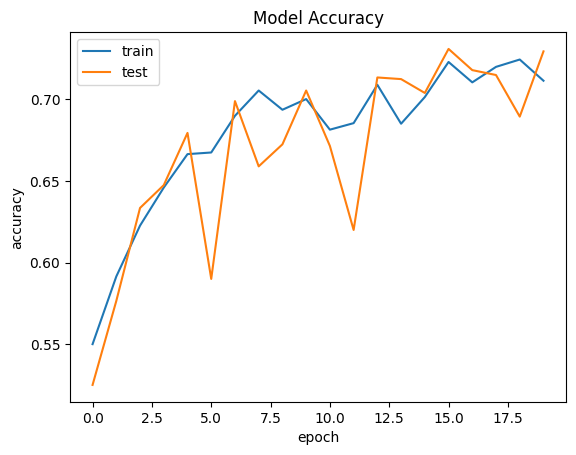

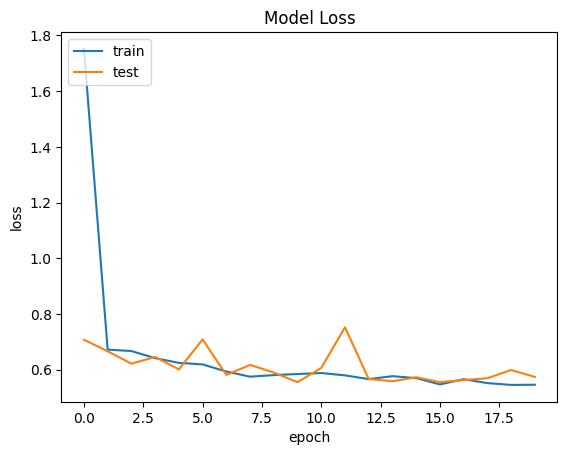

In [14]:
print (training.history.keys()) # Listing all training data
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"], loc = "upper left")
plt.show()

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"], loc = "upper left")
plt.show()

Image Prediction

1/1 [==============================] - 0s 34ms/step


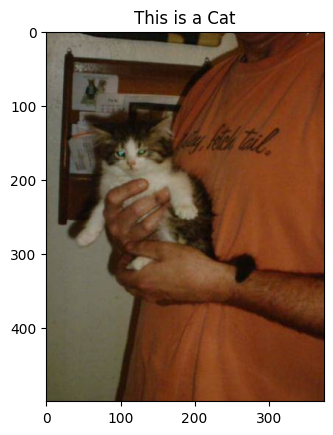

In [24]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4002.jpg", target_size=(150, 150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

# Make prediction using the model
rslt = model.predict(img_pred)

# Determine the prediction based on probability
if rslt[0][0] > 1:  # If the probability is greater than 1, classify as dog
    prediction = "This is a Dog"
else:
    prediction = "This is a Cat"

# Load and display the image
img = plt.imread("/content/test_set/test_set/cats/cat.4002.jpg")  # Use the same path as used for prediction
plt.imshow(img)
plt.title(prediction)  # Display the prediction as title
plt.show()
